#**IMPORTING(ANCHE PER JOIN SPAZIALI)**

In [ ]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig



     |████████████████████████████████| 994 kB 4.2 MB/s 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   388k      0  0:00:01  0:00:01 --:--:--  387k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for 

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.4 MB/s 
     |████████████████████████████████| 6.3 MB 35.0 MB/s 
     |████████████████████████████████| 16.7 MB 355 kB/s 


In [ ]:
%matplotlib inline

import pandas as pd
import geopandas

# **1**

In [ ]:
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm')
bus_tram = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/tpl_percorsi_shp')

In [ ]:
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


In [ ]:
bus_tram

,linea,mezzo,percorso,verso,nome,tipo_perc,lung_km,num_ferm,geometry
0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742..."
1,1,TRAM,9457,As,Greco - Roserio,Canonico,13.97,47,"LINESTRING (9.21625 45.49493, 9.21538 45.49486..."
2,10,TRAM,10930,As,Lunigiana - 24 Maggio (LAV. MONUMENTALE),Canonico,10.12,35,"LINESTRING (9.20557 45.49136, 9.20555 45.49137..."
3,10,TRAM,10933,Di,24 Maggio - Lunigiana (LAV. MONUMENTALE),Canonico,9.99,35,"LINESTRING (9.17930 45.45195, 9.17931 45.45195..."
4,115,BUS,10025,As,Gratosoglio - P.za Diaz,Canonico,7.35,21,"LINESTRING (9.17375 45.40309, 9.17381 45.40305..."
...,...,...,...,...,...,...,...,...,...
414,965,BUS,7613,None,Milano - Pioltello,Canonico,11.36,16,"LINESTRING (9.21957 45.48438, 9.21998 45.48436..."
415,98,BUS,7814,Di,Lotto M1 M5 - Famagosta M2,Canonico,8.26,23,"LINESTRING (9.14160 45.47964, 9.14166 45.47953..."
416,98,BUS,9899,As,Famagosta M2 - Lotto M1 M5,Canonico,7.86,23,"LINESTRING (9.16884 45.43677, 9.16884 45.43673..."
417,99,BUS,11652,None,Noverasco - Vigentino,Canonico,3.90,7,"LINESTRING (9.21222 45.39490, 9.21216 45.39514..."


In [ ]:
bus_quart = geopandas.sjoin(bus_tram,quartieri, op = 'intersects',how ='left')
bus_quart

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,linea,mezzo,percorso,verso,nome,tipo_perc,lung_km,num_ferm,geometry,index_right,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID
0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",7.0,76.0,QUARTO OGGIARO - VIALBA - MUSOCCO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7138.355680,2.776872e+06,96.0
0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",45.0,74.0,ROSERIO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6789.327807,7.076301e+05,134.0
0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",13.0,4.0,GUASTALLA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6559.532771,1.547962e+06,102.0
0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",12.0,1.0,DUOMO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101.0
0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",79.0,7.0,MAGENTA - S. VITTORE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5492.852406,1.390094e+06,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,99,BUS,11652,None,Noverasco - Vigentino,Canonico,3.90,7,"LINESTRING (9.21222 45.39490, 9.21216 45.39514...",55.0,85.0,PARCO DELLE ABBAZIE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,33829.221463,1.373384e+07,144.0
417,99,BUS,11652,None,Noverasco - Vigentino,Canonico,3.90,7,"LINESTRING (9.21222 45.39490, 9.21216 45.39514...",38.0,38.0,VIGENTINO - Q.RE FATIMA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6479.236348,1.853163e+06,127.0
418,99,BUS,11653,None,Vigentino - Noverasco,Canonico,4.82,8,"LINESTRING (9.20342 45.42120, 9.20287 45.42147...",24.0,39.0,QUINTOSOLE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6740.830821,1.058525e+06,113.0
418,99,BUS,11653,None,Vigentino - Noverasco,Canonico,4.82,8,"LINESTRING (9.20342 45.42120, 9.20287 45.42147...",55.0,85.0,PARCO DELLE ABBAZIE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,33829.221463,1.373384e+07,144.0


In [ ]:
linea_input = input()
linea_input2 = bus_quart[bus_quart.linea == linea_input]
bus_quartieri = bus_quart[bus_quart.intersects(linea_input2.unary_union)]
bus_quartieri[['NIL']]

1


,NIL
0,QUARTO OGGIARO - VIALBA - MUSOCCO
1,ROSERIO
2,GUASTALLA
3,DUOMO
4,MAGENTA - S. VITTORE
...,...
1936,DUOMO
1937,MAGENTA - S. VITTORE
1938,BRERA
1939,SARPI


# **2**

In [ ]:
bus_quart

,index,linea,mezzo,percorso,verso,nome,tipo_perc,lung_km,num_ferm,geometry,index_right,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID
0,0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",7.0,76.0,QUARTO OGGIARO - VIALBA - MUSOCCO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7138.355680,2.776872e+06,96.0
1,0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",45.0,74.0,ROSERIO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6789.327807,7.076301e+05,134.0
2,0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",13.0,4.0,GUASTALLA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6559.532771,1.547962e+06,102.0
3,0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",12.0,1.0,DUOMO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101.0
4,0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",79.0,7.0,MAGENTA - S. VITTORE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5492.852406,1.390094e+06,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,417,99,BUS,11652,None,Noverasco - Vigentino,Canonico,3.90,7,"LINESTRING (9.21222 45.39490, 9.21216 45.39514...",55.0,85.0,PARCO DELLE ABBAZIE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,33829.221463,1.373384e+07,144.0
1984,417,99,BUS,11652,None,Noverasco - Vigentino,Canonico,3.90,7,"LINESTRING (9.21222 45.39490, 9.21216 45.39514...",38.0,38.0,VIGENTINO - Q.RE FATIMA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6479.236348,1.853163e+06,127.0
1985,418,99,BUS,11653,None,Vigentino - Noverasco,Canonico,4.82,8,"LINESTRING (9.20342 45.42120, 9.20287 45.42147...",24.0,39.0,QUINTOSOLE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6740.830821,1.058525e+06,113.0
1986,418,99,BUS,11653,None,Vigentino - Noverasco,Canonico,4.82,8,"LINESTRING (9.20342 45.42120, 9.20287 45.42147...",55.0,85.0,PARCO DELLE ABBAZIE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,33829.221463,1.373384e+07,144.0


In [ ]:
bus_quartieri

,index,linea,mezzo,percorso,verso,nome,tipo_perc,lung_km,num_ferm,geometry,index_right,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID
0,0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",7.0,76.0,QUARTO OGGIARO - VIALBA - MUSOCCO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7138.355680,2.776872e+06,96.0
1,0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",45.0,74.0,ROSERIO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6789.327807,7.076301e+05,134.0
2,0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",13.0,4.0,GUASTALLA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6559.532771,1.547962e+06,102.0
3,0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",12.0,1.0,DUOMO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101.0
4,0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",79.0,7.0,MAGENTA - S. VITTORE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5492.852406,1.390094e+06,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,410,94,BUS,11522,Di,Minghetti - P.ta Volta,Canonico,7.01,24,"LINESTRING (9.17755 45.46870, 9.17738 45.46859...",12.0,1.0,DUOMO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101.0
1937,410,94,BUS,11522,Di,Minghetti - P.ta Volta,Canonico,7.01,24,"LINESTRING (9.17755 45.46870, 9.17738 45.46859...",79.0,7.0,MAGENTA - S. VITTORE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5492.852406,1.390094e+06,168.0
1938,410,94,BUS,11522,Di,Minghetti - P.ta Volta,Canonico,7.01,24,"LINESTRING (9.17755 45.46870, 9.17738 45.46859...",84.0,2.0,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173.0
1939,410,94,BUS,11522,Di,Minghetti - P.ta Volta,Canonico,7.01,24,"LINESTRING (9.17755 45.46870, 9.17738 45.46859...",81.0,69.0,SARPI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6456.320879,1.811846e+06,170.0


In [ ]:
bus_quart = geopandas.sjoin(bus_tram,quartieri, op = 'intersects',how ='left').reset_index()
bus_quart2 =  pd.pivot_table(bus_quart,index=["linea","NIL"],values=["ID_NIL"])
bus_quart2

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


ID_NIL
linea NIL                                                  
1     BRERA                                             2.0
      BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE    21.0
      DUOMO                                             1.0
      GUASTALLA                                         4.0
      LORETO - CASORETTO - NOLO                        20.0
...                                                     ...
98    SAN SIRO                                         57.0
      STADIO - IPPODROMI                               60.0
99    PARCO DELLE ABBAZIE                              85.0
      QUINTOSOLE                                       39.0
      VIGENTINO - Q.RE FATIMA                          38.0

[812 rows x 1 columns]

# **3**

In [ ]:
no_linea

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


In [ ]:
bus_num = bus_quart2.groupby('NIL')[['linea']].count()
no_linea = quartieri[~quartieri['NIL'].isin(bus_quart2['linea'])]
num_empty_linea  = pd.concat([bus_num,no_linea],axis = 0).sort_values(by ='linea', ascending = False).reset_index()
num_empty_linea

KeyError: ignored

# 4

AttributeError: ignored

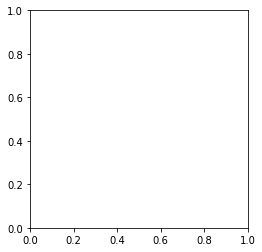

In [ ]:

bus_num_total = geopandas.GeoDataFrame(pd.merge(num_empty_linea,bus_quart,how ='left', on='NIL').drop_duplicates())
bus_num_total.rename(columns={'linea_x':'Linea','linea_y':'Linea'})

bus_num_total.plot(by='linea_x',legend = True)